# Predicting Customer Churn in python: Model Predictions

Having completed exploring and preprocessing data, it's now time to build our classifier and make predictions.

Supervised Machine Learning Primer:
* Goal: Predict wether or not a customer will churn
* Target Variable: 'Churn'
* Supervised machine learning
* Learn from historical (training) data to make new predictions




This will be a classification problem.
* Logistic regression will be a good base model.
    * It offers simplicity and interpretability.
    * However, it is not flexible enough to capture more complex relationships in our dataset. 

* Random Forests are a good next step. 
    * They have high performance 
    * but offer limited interpretability. 

* Support Vector Machines are another option. 
    * They generally perform well, 
    * but are inefficient trainers and are not very interpretable.

We will have a chance to try all these models in the exercises. 

## The Dataset

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [2]:
telco_df=pd.read_csv('./telco_preprocessed.csv')
telco_df

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.544628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,0,1,77,26.55,126,18.32,83,12.56,6,2.67,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.362651
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,0,57,39.29,55,13.04,123,8.61,4,2.59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.555285
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,0,109,30.74,58,24.55,91,8.64,6,3.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.108791
3331,184,0,213.8,159.6,139.2,5.0,2,0,1,0,105,36.35,84,13.57,137,6.26,10,1.35,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.016058


## Predicting whether a new customer will churn

In [3]:
features=['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [4]:
new_customer=pd.DataFrame(columns=features)
new_customer.loc[len(new_customer.index)] = [ 91, 23, 232.4, 186.0,190.5, 12.3, 3, 0, 1, 97, 39.51, 88, 15.81, 128, 8.57, 3, 3.32 ] 
new_customer

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,91.0,23.0,232.4,186.0,190.5,12.3,3.0,0.0,1.0,97.0,39.51,88.0,15.81,128.0,8.57,3.0,3.32


In [5]:
telco_df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Intl_Plan       3333 non-null   int64  
 8   Vmail_Plan      3333 non-null   int64  
 9   Day_Calls       3333 non-null   int64  
 10  Day_Charge      3333 non-null   float64
 11  Eve_Calls       3333 non-null   int64  
 12  Eve_Charge      3333 non-null   float64
 13  Night_Calls     3333 non-null   int64  
 14  Night_Charge    3333 non-null   float64
 15  Intl_Calls      3333 non-null   int64  
 16  Intl_Charge     3333 non-null   float64
dtypes: float64(8), int64(9)
memory us

In [6]:
telco_df[features].head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [7]:
telco_df['Churn'].dtype

dtype('int64')

In [8]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression(max_iter=10000)

# Fit the classifier
clf.fit(telco_df[features], telco_df['Churn'])



LogisticRegression(max_iter=10000)

In [9]:
# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


## Training another scikit-learn model

In [10]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier


# Instantiate the classifier
clf=DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco_df[features],telco_df['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


# Evaluating Model Preformance

## Creating training and test sets

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco_df.drop('Churn', axis=1)

# Create target variable
y = telco_df['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
X_train.shape

(2333, 69)

In [13]:
X_test.shape

(1000, 69)

# Computing accuracy

In [14]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)


# Compute accuracy
print(clf.score(X_test, y_test))

0.939


# Model Metrics

**Imbalanced classes**

Many datasets tend to have imbalanced classes: That is, more data points that belong to one category than another. 

In our churn dataset, for example, there are nearly 6 times as many non-churners as there are churners. 

This can have an impact on the performance of our model as it might learn to always predict the majority class

There are techniques such as upsampling and downsampling that we can use to balance the classes and solve this problem.

For our purposes, what this means is that when working with imbalanced classes, accuracy is not a very useful metric. If we were to build a classifier that ALWAYS predicted that a customer would NOT churn, it would be very accurate - about 85% accurate, in this case - yet it would completely fail at identifying customers who will actually churn. This creates the need for metrics that are more nuanced.

To better understand this, we can draw a confusion matrix and analyze other metrics.

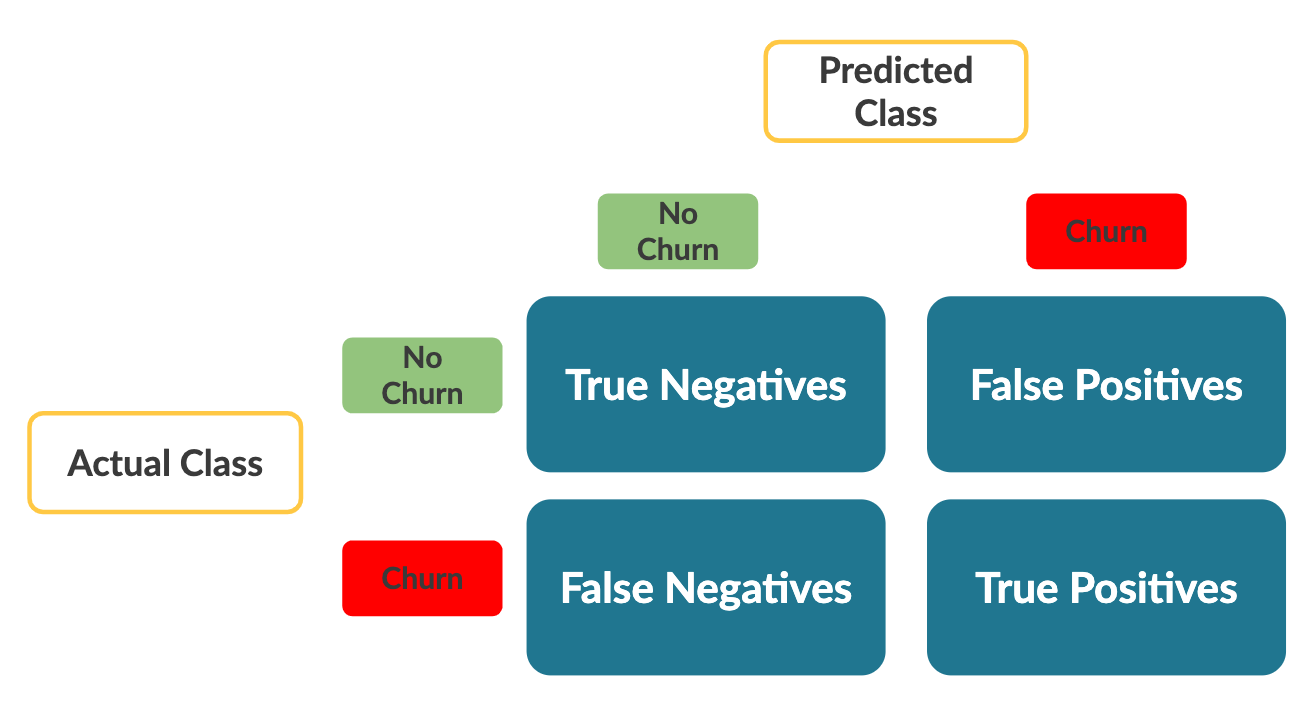

In [15]:

from IPython.display import display
from IPython.display import Image
i=Image(filename='./confusion_matrix.png',width=600)
display(i)

### Precision (specificity)

$$Precission=\frac {True~Positive} {True~Positive + False~Positive} $$

If our model had high precision, it would mean that there were not many false positives.

### Recall (True Positive Rate, Sensitivity)

$$Recall=\frac {True~Positive} {True~Positive + False~Negative} $$

A high recall, it would mean that there were not many false negatives.

### Precision vs. Recall

Which metric you focus on optimizing often depends on the business case. 

If the offers we make to keep potential churners is high in relation to the value of losing customers, we want your minimize false positives. Hence, the appropriate metric would be precision.

Conversely, if losing customers we didn't think would churn is more expensive than an offer, we would want to minimize false negatives. So, the appropriate metric would be recall.

## Confusion Matrix

In [16]:
y_pred=clf.predict(X_test)

In [17]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[850   4]
 [ 57  89]]


In [18]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
print(confusion_matrix(y_test,y_pred))

[[850   4]
 [ 57  89]]


## Varying training set size

In [19]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco_df.drop('Churn', axis=1)

# Create target variable
y = telco_df['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

[[569   0]
 [ 48  50]]


Comparing the confusion matrix we can see thet the new model has:
* Higher accuracy
* Higher precission
* Lower recall

## Precision score

In [21]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco_df.drop('Churn', axis=1)

# Create target variable
y = telco_df['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import precision_score

# Print the recall
print(precision_score(y_test, y_pred))

0.9459459459459459


## Recall score

In [22]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco_df.drop('Churn', axis=1)

# Create target variable
y = telco_df['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

0.6964285714285714


# Other Model Metrics

**Probability thresholds**

Every prediction a classifier makes on a new data point, has an associated probability. By default in scikit-learn, if this probability is above 50%, then your model would predict the data point as belonging to the positive class, and if it is lower than 50%, it would predict the negative class. In other words, the default probability threshold here is 50%. 

What happens if we vary this threshold, and, for each threshold, plot the model's true positive rate against the false positive rate? We get what is known as the ROC curve.
This curve allows you to diagnose the performance of the model at different thresholds.

The y-axis is the true positive rate and ranges from 0 to 1,

$$True~Positive~Rate~(TPR)=Recall=\frac {True~Positive} {True~Positive + False~Negative} $$

and the x-axis is the false positive rate which also ranges from 0 to 1.

$$False~Positive~Rate~(FPR)=\frac {False~Positive} {False~Positive + True~Negative} $$


A perfect classifier, then, would have a true positive rate of 1 and false positive rate of 0. 
The ROC curve of a model that randomly guesses would be a diagonal line. This information can be used to extract another useful metric: the area under the ROC curve.

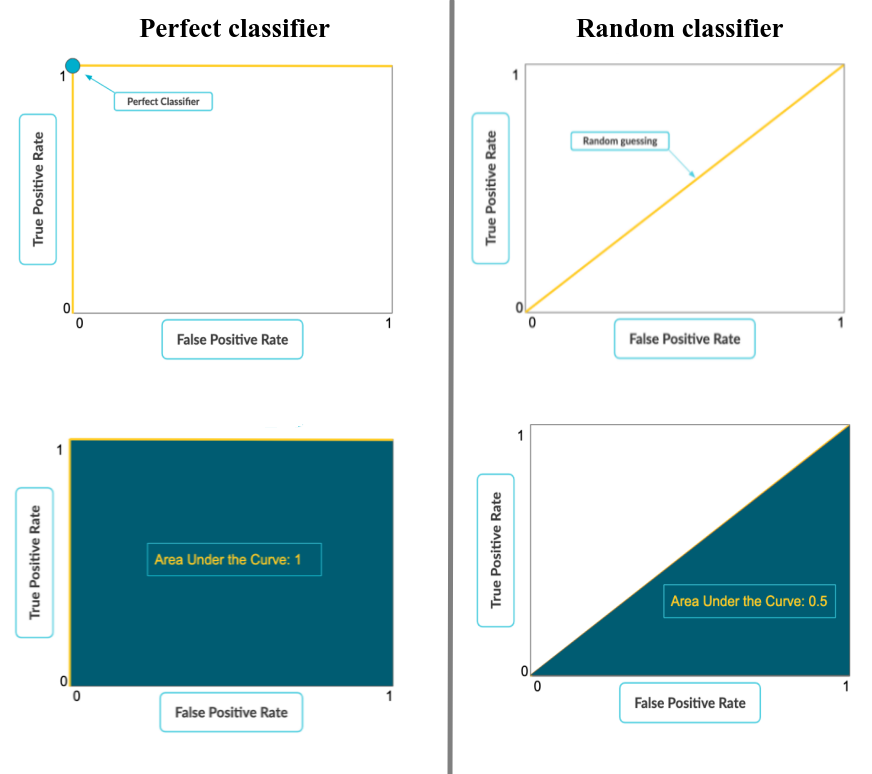

In [23]:
i=Image(filename='./AUROC_curve.png',width=600)
display(i)

 Notice that a better performing model will have a larger area under the curve.
Our model will lie somewhere between the perfect classifier and the random classifier so the AUROC metric will be between 0.5 and 1.

## ROC curve

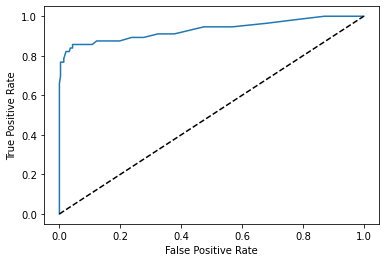

In [24]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve
from  matplotlib import pyplot as plt

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

## Area under the curve

In [25]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

0.9320721993833504


## Precision-recall curve

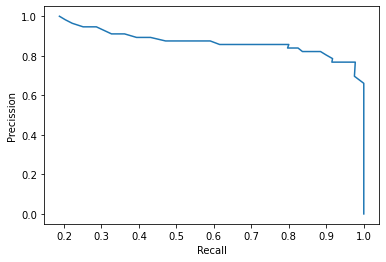

In [26]:

# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import precission_recall_curve
from sklearn.metrics import precision_recall_curve

# Calculate the roc metrics
rec, prec, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(rec,prec)

# Add labels and diagonal line
plt.xlabel("Recall")
plt.ylabel("Precission")
plt.show()


This curves summarize the tradeoff between the true positive rate and the positive predictive value.

A high area under the curve represents both high recall and high precision.

Precision-recall curves tend to be more informative when we have imbalanced classes.

## F1 score


As we've discovered, there's a tradeoff between precision and recall. 

Both are important metrics, and depending on how the business is trying to model churn, we may want to focus on optimizing one over the other. 

Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

$$\frac{1}{F_1}= \frac{1}{2}  * \left ( \frac{1}{Precission} + \frac{1}{Recall} \right )$$

The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where we might have imbalanced classes. 


In [27]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score 

# Print the F1 score
print(f1_score(y_test,y_pred))

0.7608695652173912
